In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm

In [2]:
class histContainer:
    def __init__(self,path,noMeta=False,bkg=False):
        if noMeta:
            self.histos, self.metadata = util.load(path), None
        else:
            self.histos, self.metadata = util.load(path)
        self.hnames = list(self.histos.keys())
        if bkg:
            self.catSamps,self.catNames = utils.bkg_categories(self.histos['cutflow'])
            self.cats = list(self.catSamps.keys())
    def load(self,hname):
        return self.histos[hname]
    def load(self,hname):
        return self.histos[hname]
    def names(self,spec=None):
        if spec is not None:
            print("\n".join([h for h in self.hnames if spec in h]))
        else:
            print("\n".join(self.hnames))

In [6]:
hcs = histContainer("signal_2018_triggerStudy.coffea")
hcd = histContainer("data_2018_MET_v1_triggerStudy.coffea")

In [7]:
hs = hcs.load("MET_passTrig")[{"samp":sum}]
hd = hcd.load("MET_passTrig")[{"samp":sum}]

sig_num = hs[{'passTrig':1}]
sig_bins = sig_num.axes[0].edges
sig_num = sig_num.values()
sig_den = hs[{'passTrig':sum}].values()
sig_eff = np.divide(sig_num,sig_den,where=sig_den!=0,out=np.zeros_like(sig_num))
sig_eff_uncert = sig_eff * (np.divide(1,sig_num,where=sig_num!=0,out=np.zeros_like(sig_num)) +\
                            np.divide(1,sig_den,where=sig_den!=0,out=np.zeros_like(sig_den)))

data_num = hd[{'passTrig':1}]
data_bins = data_num.axes[0].edges
data_num = data_num.values()
data_den = hd[{'passTrig':sum}].values()
data_eff = np.divide(data_num,data_den,where=data_den!=0,out=np.zeros_like(data_num))
data_eff_uncert = data_eff * (np.divide(1,data_num,where=data_num!=0,out=np.zeros_like(data_num)) +\
                            np.divide(1,data_den,where=data_den!=0,out=np.zeros_like(data_den)))

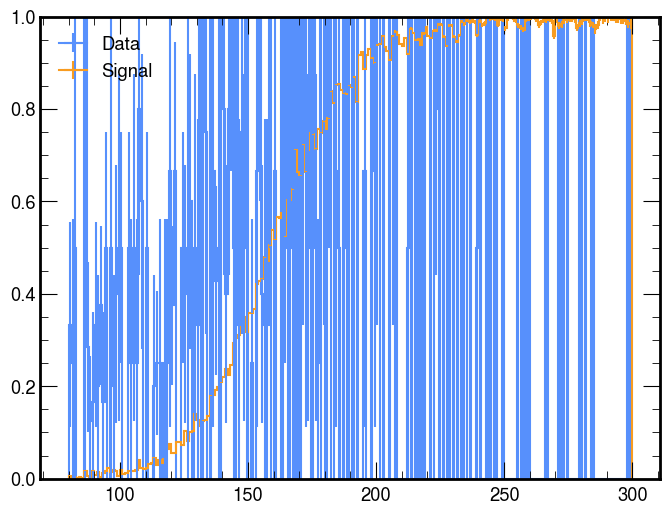

In [8]:
plt.figure(figsize=(8,6))
hep.histplot([data_eff,sig_eff],bins=data_bins,yerr=[data_eff_uncert,sig_eff_uncert],label=['Data','Signal'])
plt.ylim([0,1])
plt.legend()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f60af915250>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

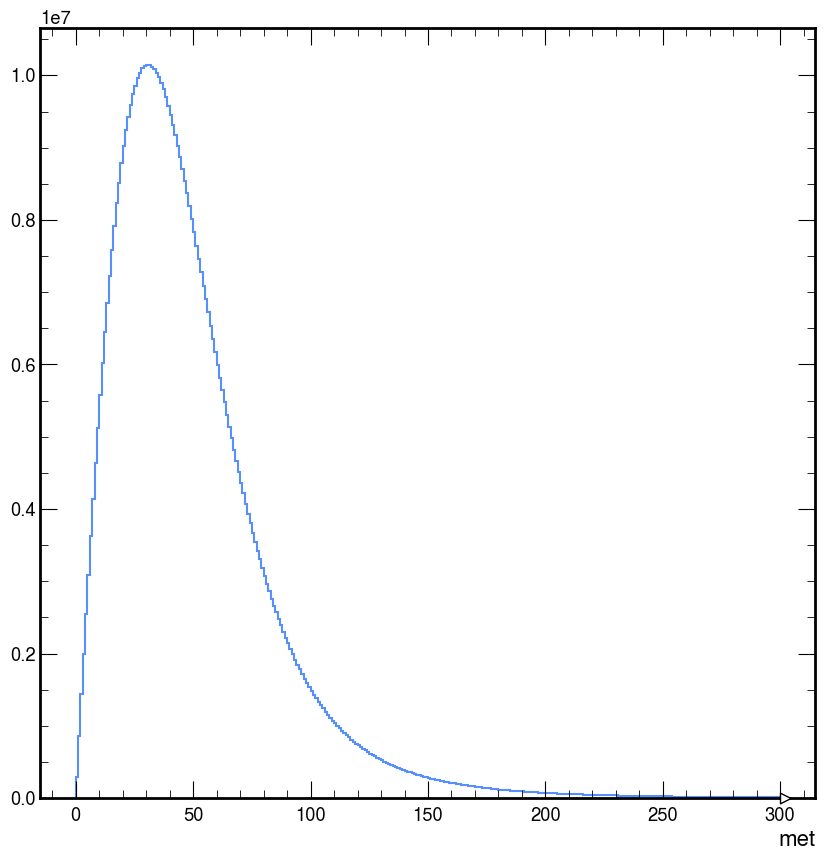

In [25]:
allmet = hcd.load("MET_all")[{"samp":sum}]
hep.histplot(allmet)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f60af7521c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

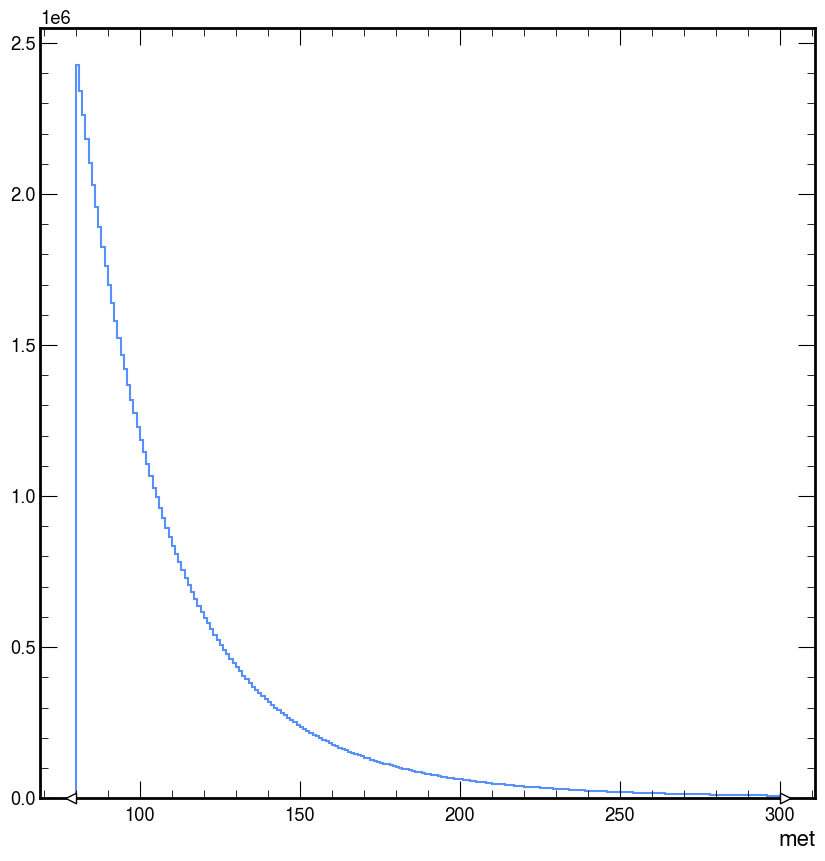

In [26]:
hep.histplot(hd[{'passTrig':sum}])